# Applied Data Science Capstone

# 1. Population and economic data

In [1]:
import pandas as pd
import numpy as np

## 1.1 Read data

Import data from Statistics Denmark on GDP, population, GSP per capita and population forecasts.

In [2]:
gdp_path = "C:/Users/Nick/Desktop/IBM Data Science/Applied Data Science Capstone/GDP.csv"
df_gdp = pd.read_csv(gdp_path, header=None)
df_gdp.tail(5)

,0,1,2,3
22,,,2015,377514
23,,,2016,392199
24,,,2017,417319
25,,,2018,429997
26,,,2019,437684


In [3]:
gdpcap_path = "C:/Users/Nick/Desktop/IBM Data Science/Applied Data Science Capstone/GDP per capita.csv"
df_gdpcap = pd.read_csv(gdpcap_path, header=None)
df_gdpcap.tail(5)

,0,1,2,3
22,,,2015,506
23,,,2016,517
24,,,2017,542
25,,,2018,551
26,,,2019,554


In [4]:
pop_path = "C:/Users/Nick/Desktop/IBM Data Science/Applied Data Science Capstone/Population.csv"
df_pop = pd.read_csv(pop_path, header=None)
df_pop.tail(5)

,0,1,2,3,4
48,,,,2020Q1,632340
49,,,,2020Q2,633449
50,,,,2020Q3,633035
51,,,,2020Q4,637936
52,,,,2021Q1,638117


In [5]:
proj_path = "C:/Users/Nick/Desktop/IBM Data Science/Applied Data Science Capstone/Projections.csv"
df_proj = pd.read_csv(proj_path, header=None)
df_proj.tail(5)

,0,1,2
21,,2041,909411
22,,2042,912097
23,,2043,914755
24,,2044,917451
25,,2045,920236


## 1.2 Add Headers

Remove blank columns, modify the headers and change index to be more user friendly.

In [6]:
#Remove blank columns
cols = [0,1]
df_gdp = df_gdp.drop(df_gdp.columns[cols], axis =1)
df_gdpcap = df_gdpcap.drop(df_gdpcap.columns[cols], axis =1)
cols_pop = [0,1,2]  
df_pop = df_pop.drop(df_pop.columns[cols_pop], axis =1)
cols_pop = [0] 
df_proj = df_proj.drop(df_proj.columns[cols_pop], axis =1)

In [7]:
headers = ["Quarter","Population"]
print("headers\n", headers)

# replace headers
df_pop.columns = headers

# change index
df_pop = df_pop.set_index('Quarter')

df_pop.head(5)

headers
 ['Quarter', 'Population']


,Population
Quarter,
2008Q1,509861
2008Q2,511725
2008Q3,511686
2008Q4,516962
2009Q1,518574


In [8]:
headers = ["Year","GDP per capita"]
print("headers\n", headers)

# replace headers
df_gdpcap.columns = headers

# change index
df_gdpcap = df_gdpcap.set_index('Year')

df_gdpcap.head(5)

headers
 ['Year', 'GDP per capita']


,GDP per capita
Year,
1993,247
1994,263
1995,270
1996,271
1997,286


In [9]:
headers = ["Quarter","GDP"]
print("headers\n", headers)

# replace headers
df_gdp.columns = headers

# change index
df_gdp = df_gdp.set_index('Quarter')

df_gdp.head(5)

headers
 ['Quarter', 'GDP']


,GDP
Quarter,
1993,149651
1994,159740
1995,165463
1996,168032
1997,179547


In [10]:
headers = ["Year","Population"]
print("headers\n", headers)

# replace headers
df_proj.columns = headers

# change index
df_proj = df_proj.set_index('Year')

df_proj.head(5)

headers
 ['Year', 'Population']


,Population
Year,
2020,794128
2021,802602
2022,810650
2023,818453
2024,825962


# 2. Basic Insight

Explore basic insights regarding the macroeconomic and population context in Copenhagen.

In [11]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

## 2.1 GDP

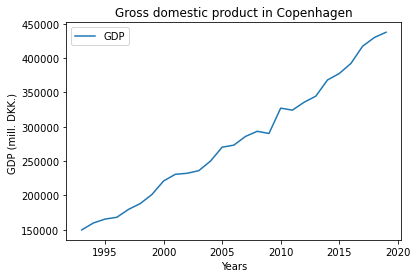

In [12]:
df_gdp.plot(kind='line')

plt.title('Gross domestic product in Copenhagen')
plt.ylabel('GDP (mill. DKK.) ')
plt.xlabel('Years')

plt.show() 

## 2.2 Population

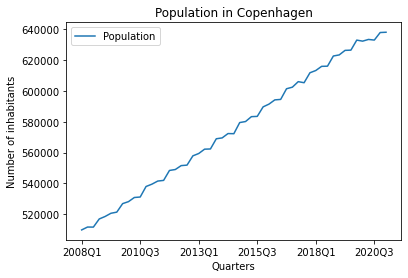

In [13]:
df_pop.plot(kind='line')

plt.title('Population in Copenhagen')
plt.ylabel('Number of inhabitants')
plt.xlabel('Quarters')

plt.show() 

## 2.3 GDP per capita

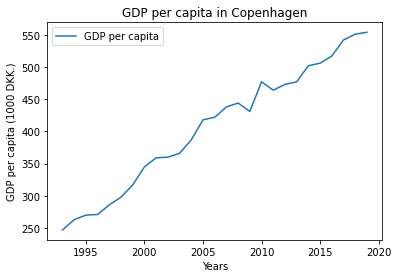

In [14]:
df_gdpcap.plot(kind='line')

plt.title('GDP per capita in Copenhagen')
plt.ylabel('GDP per capita (1000 DKK.)')
plt.xlabel('Years')

plt.show() 

## 2.4 Population projections 

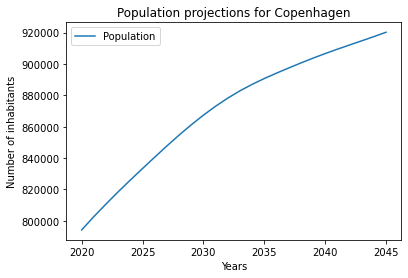

In [15]:
df_proj.plot(kind='line')

plt.title('Population projections for Copenhagen')
plt.ylabel('Number of inhabitants')
plt.xlabel('Years')

plt.show() 

# 3. Geographical data

## 3.1 Import geojson data

Import geojson data with details on train stations from the Open Data Denmark portal. 

In [16]:
import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize

In [17]:
!pip install geojson

In [18]:
#Import geojson file
import geojson

json_path = "C:/Users/Nick/Desktop/IBM Data Science/Applied Data Science Capstone/geoserver-GetFeature.application.json"
with open(json_path) as f:
    gj = geojson.load(f)
features = gj['features']

In [19]:
features

[{"geometry": {"coordinates": [[12.646822, 55.635822]], "type": "MultiPoint"}, "geometry_name": "wkb_geometry", "id": "station_oversigtskort.1", "properties": {"id": 44, "kommune": "T\u00c3\u00a5rnby", "navn": "Kastrup", "objekt_type": "Metrostation"}, "type": "Feature"},
 {"geometry": {"coordinates": [[12.503986, 55.667183]], "type": "MultiPoint"}, "geometry_name": "wkb_geometry", "id": "station_oversigtskort.2", "properties": {"id": 45, "kommune": "K\u00c3\u00b8benhavn", "navn": "Langgade", "objekt_type": "S-station"}, "type": "Feature"},
 {"geometry": {"coordinates": [[12.503343, 55.678172]], "type": "MultiPoint"}, "geometry_name": "wkb_geometry", "id": "station_oversigtskort.3", "properties": {"id": 46, "kommune": "Frederiksberg", "navn": "Peter Bangs Vej", "objekt_type": "S-station"}, "type": "Feature"},
 {"geometry": {"coordinates": [[12.492161, 55.677912]], "type": "MultiPoint"}, "geometry_name": "wkb_geometry", "id": "station_oversigtskort.4", "properties": {"id": 47, "kommune"

In [20]:
#Convert geojson file to dataframe
data = json.load(open(json_path))
stations = json_normalize(data, 'features')
stations

<ipython-input-20-cdae287e2ad3>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  stations = json_normalize(data, 'features')


,type,id,geometry_name,geometry.type,geometry.coordinates,properties.id,properties.objekt_type,properties.navn,properties.kommune
0,Feature,station_oversigtskort.1,wkb_geometry,MultiPoint,"[[12.646822177590394, 55.635821860424315]]",44,Metrostation,Kastrup,TÃ¥rnby
1,Feature,station_oversigtskort.2,wkb_geometry,MultiPoint,"[[12.503985639108704, 55.66718308046223]]",45,S-station,Langgade,KÃ¸benhavn
2,Feature,station_oversigtskort.3,wkb_geometry,MultiPoint,"[[12.503343020635267, 55.67817189737545]]",46,S-station,Peter Bangs Vej,Frederiksberg
3,Feature,station_oversigtskort.4,wkb_geometry,MultiPoint,"[[12.492160770691216, 55.67791235316916]]",47,S-station,KB Hallen,KÃ¸benhavn
4,Feature,station_oversigtskort.5,wkb_geometry,MultiPoint,"[[12.499082899528844, 55.65973381653242]]",50,S-station,Vigerslev AllÃ©,KÃ¸benhavn
...,...,...,...,...,...,...,...,...,...
70,Feature,station_oversigtskort.71,wkb_geometry,MultiPoint,"[[12.586547353558078, 55.6925377378731]]",74,Metrostation,Ã˜sterport,KÃ¸benhavn
71,Feature,station_oversigtskort.72,wkb_geometry,MultiPoint,"[[12.575513810445555, 55.69920370083408]]",75,Metrostation,Trianglen,KÃ¸benhavn
72,Feature,station_oversigtskort.73,wkb_geometry,MultiPoint,"[[12.585029747412495, 55.679937619435]]",27,Metrostation,Kongens Nytorv,KÃ¸benhavn
73,Feature,station_oversigtskort.74,wkb_geometry,MultiPoint,"[[12.595149538788558, 55.71182010925291]]",77,Metrostation,Orientkaj,KÃ¸benhavn


## 3.2 Clean data

Clean the dataframe with geographical data.

In [21]:
#Drop irrelevant columns from dataframe
stations.drop(['type','id','geometry_name', 'geometry.type','properties.id'], axis=1, inplace=True)
stations

,geometry.coordinates,properties.objekt_type,properties.navn,properties.kommune
0,"[[12.646822177590394, 55.635821860424315]]",Metrostation,Kastrup,TÃ¥rnby
1,"[[12.503985639108704, 55.66718308046223]]",S-station,Langgade,KÃ¸benhavn
2,"[[12.503343020635267, 55.67817189737545]]",S-station,Peter Bangs Vej,Frederiksberg
3,"[[12.492160770691216, 55.67791235316916]]",S-station,KB Hallen,KÃ¸benhavn
4,"[[12.499082899528844, 55.65973381653242]]",S-station,Vigerslev AllÃ©,KÃ¸benhavn
...,...,...,...,...
70,"[[12.586547353558078, 55.6925377378731]]",Metrostation,Ã˜sterport,KÃ¸benhavn
71,"[[12.575513810445555, 55.69920370083408]]",Metrostation,Trianglen,KÃ¸benhavn
72,"[[12.585029747412495, 55.679937619435]]",Metrostation,Kongens Nytorv,KÃ¸benhavn
73,"[[12.595149538788558, 55.71182010925291]]",Metrostation,Orientkaj,KÃ¸benhavn


In [22]:
#Correct for Danish alphabet
stations.replace('Ã¥','å', regex=True, inplace=True)
stations.replace('Ã¸','ø', regex=True, inplace=True)
stations.replace('Ã©','é', regex=True, inplace=True)
stations.replace("Ã¦",'æ', regex=True, inplace=True)
stations.replace("Ã˜",'Ø', regex=True, inplace=True)
stations

,geometry.coordinates,properties.objekt_type,properties.navn,properties.kommune
0,"[[12.646822177590394, 55.635821860424315]]",Metrostation,Kastrup,Tårnby
1,"[[12.503985639108704, 55.66718308046223]]",S-station,Langgade,København
2,"[[12.503343020635267, 55.67817189737545]]",S-station,Peter Bangs Vej,Frederiksberg
3,"[[12.492160770691216, 55.67791235316916]]",S-station,KB Hallen,København
4,"[[12.499082899528844, 55.65973381653242]]",S-station,Vigerslev Allé,København
...,...,...,...,...
70,"[[12.586547353558078, 55.6925377378731]]",Metrostation,Østerport,København
71,"[[12.575513810445555, 55.69920370083408]]",Metrostation,Trianglen,København
72,"[[12.585029747412495, 55.679937619435]]",Metrostation,Kongens Nytorv,København
73,"[[12.595149538788558, 55.71182010925291]]",Metrostation,Orientkaj,København


In [23]:
#rename the dataframe columns
stations.rename(columns={'properties.objekt_type': 'Type', 'properties.navn': 'Name', 'properties.kommune': 'Town'}, inplace=True)
stations

,geometry.coordinates,Type,Name,Town
0,"[[12.646822177590394, 55.635821860424315]]",Metrostation,Kastrup,Tårnby
1,"[[12.503985639108704, 55.66718308046223]]",S-station,Langgade,København
2,"[[12.503343020635267, 55.67817189737545]]",S-station,Peter Bangs Vej,Frederiksberg
3,"[[12.492160770691216, 55.67791235316916]]",S-station,KB Hallen,København
4,"[[12.499082899528844, 55.65973381653242]]",S-station,Vigerslev Allé,København
...,...,...,...,...
70,"[[12.586547353558078, 55.6925377378731]]",Metrostation,Østerport,København
71,"[[12.575513810445555, 55.69920370083408]]",Metrostation,Trianglen,København
72,"[[12.585029747412495, 55.679937619435]]",Metrostation,Kongens Nytorv,København
73,"[[12.595149538788558, 55.71182010925291]]",Metrostation,Orientkaj,København


In [24]:
#Split the coordinates into latitudes and longitudes 
stations['geometry.coordinates'] = stations['geometry.coordinates'].astype(str)
stations[['Longitude','Latitude']] = stations['geometry.coordinates'].apply( 
   lambda x: pd.Series(str(x).split(","))) 
stations

,geometry.coordinates,Type,Name,Town,Longitude,Latitude
0,"[[12.646822177590394, 55.635821860424315]]",Metrostation,Kastrup,Tårnby,[[12.646822177590394,55.635821860424315]]
1,"[[12.503985639108704, 55.66718308046223]]",S-station,Langgade,København,[[12.503985639108704,55.66718308046223]]
2,"[[12.503343020635267, 55.67817189737545]]",S-station,Peter Bangs Vej,Frederiksberg,[[12.503343020635267,55.67817189737545]]
3,"[[12.492160770691216, 55.67791235316916]]",S-station,KB Hallen,København,[[12.492160770691216,55.67791235316916]]
4,"[[12.499082899528844, 55.65973381653242]]",S-station,Vigerslev Allé,København,[[12.499082899528844,55.65973381653242]]
...,...,...,...,...,...,...
70,"[[12.586547353558078, 55.6925377378731]]",Metrostation,Østerport,København,[[12.586547353558078,55.6925377378731]]
71,"[[12.575513810445555, 55.69920370083408]]",Metrostation,Trianglen,København,[[12.575513810445555,55.69920370083408]]
72,"[[12.585029747412495, 55.679937619435]]",Metrostation,Kongens Nytorv,København,[[12.585029747412495,55.679937619435]]
73,"[[12.595149538788558, 55.71182010925291]]",Metrostation,Orientkaj,København,[[12.595149538788558,55.71182010925291]]


In [25]:
stations.drop(['geometry.coordinates'], axis=1, inplace=True)
stations['Latitude'] = stations['Latitude'].astype(str)
stations['Longitude'] = stations['Longitude'].astype(str)
#stations.replace('[[','', regex=True, inplace=True) 
stations['Latitude'] = stations['Latitude'].str.replace("]", "")
stations['Longitude'] = stations['Longitude'].str.replace("[", "")
#stations.replace(']]','', regex=True, inplace=True)
stations['Latitude'] = stations['Latitude'].astype(float)
stations['Longitude'] = stations['Longitude'].astype(float)
stations

,Type,Name,Town,Longitude,Latitude
0,Metrostation,Kastrup,Tårnby,12.646822,55.635822
1,S-station,Langgade,København,12.503986,55.667183
2,S-station,Peter Bangs Vej,Frederiksberg,12.503343,55.678172
3,S-station,KB Hallen,København,12.492161,55.677912
4,S-station,Vigerslev Allé,København,12.499083,55.659734
...,...,...,...,...,...
70,Metrostation,Østerport,København,12.586547,55.692538
71,Metrostation,Trianglen,København,12.575514,55.699204
72,Metrostation,Kongens Nytorv,København,12.585030,55.679938
73,Metrostation,Orientkaj,København,12.595150,55.711820


## 3.3 Create map of Copenhagen

Create a base map of Copenhagen using latitude and longitude values from geopy and the folium library.

In [26]:
import folium 
import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize

Solving environment: ...working... done

# All requested packages already installed.



In [27]:
address = 'Copenhagen, Denmark'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Copenhagen are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Copenhagen are 55.6867243, 12.5700724.


In [28]:
map_copenhagen = folium.Map(location=[latitude, longitude], zoom_start=12)
map_copenhagen

Generate a map of the train stations in Copenhagen.

In [29]:
stations_map = stations.drop(['Type','Town'], axis=1)
stations_map

,Name,Longitude,Latitude
0,Kastrup,12.646822,55.635822
1,Langgade,12.503986,55.667183
2,Peter Bangs Vej,12.503343,55.678172
3,KB Hallen,12.492161,55.677912
4,Vigerslev Allé,12.499083,55.659734
...,...,...,...
70,Østerport,12.586547,55.692538
71,Trianglen,12.575514,55.699204
72,Kongens Nytorv,12.585030,55.679938
73,Orientkaj,12.595150,55.711820


In [30]:
# add markers to map
stations_map = stations.drop(['Type','Town'], axis=1)

for label, lng, lat in zip(stations_map['Name'], stations_map['Longitude'], stations_map['Latitude']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_copenhagen)  
    
map_copenhagen

# 6. Station passenger data

Import station passenger data for the busiest stations in the Copenhagen area.

In [31]:
df_stations = pd.read_csv('C:/Users/Nick/Desktop/IBM Data Science/Applied Data Science Capstone/stations.tsv',names=["Station", "Passengers"],header=None)
df_stations.head(10)

,Station,Passengers
0,Nørreport,107800
1,København H,103600
2,Østerport,28600
3,Valby,26000
4,Vesterport,23200
5,Kbh Lufthavn,22700
6,Hellerup,20300
7,Nordhavn,18200
8,Valby S,17400
9,Svanemøllen,14400


Plot passenger data if busiest train stations in Copenhagen.

In [32]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

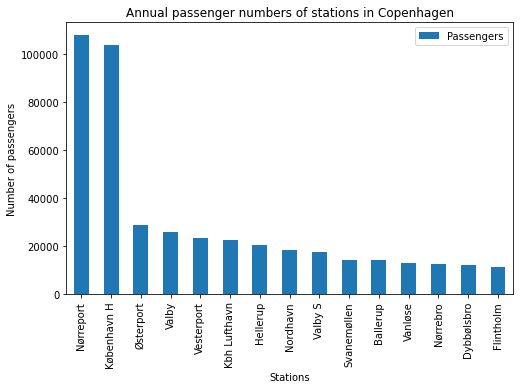

In [33]:
df_stations.plot(kind='bar',x="Station", y="Passengers", figsize=(8, 5))

plt.title('Annual passenger numbers of stations in Copenhagen') 
plt.ylabel('Number of passengers') # add y-label
plt.xlabel('Stations') # add x-label

plt.show()

# 4. Foursquare data

## 4.1 Get venues per station from Foursquare API

In [34]:
CLIENT_ID = '2MKPYSHKOMEIPY0M5JFGYX5WNJLWSCUGBZHZEIMWU43FYDAY' # your Foursquare ID
CLIENT_SECRET = 'GZ4SGE3XR211VB0AOCKNZ0SEWO0GZLPJPCUJIPUQ0OLZLLXO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2MKPYSHKOMEIPY0M5JFGYX5WNJLWSCUGBZHZEIMWU43FYDAY
CLIENT_SECRET:GZ4SGE3XR211VB0AOCKNZ0SEWO0GZLPJPCUJIPUQ0OLZLLXO


In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [36]:
copenhagen_venues = getNearbyVenues(names=stations_map['Name'],
                                   latitudes=stations_map['Latitude'],
                                   longitudes=stations_map['Longitude']
                                  )

Kastrup
Langgade
Peter Bangs Vej
KB Hallen
Vigerslev Allé
Flintholm
Forum
Frederiksberg
Fasanvej (Solbjerg)
Lindevang
Flintholm
Vanløse
Valby
Hvidovre
Rødovre
Vanløse
Ã…marken
Carlsberg
Femøren
Amager Strand
Øresund
Lergravsparken
Amagerbro
Christianshavn
Nørreport
Jyllingevej
Islands Brygge
DR Byen (Universitetet)
Sundby
Bella Center
Ørestad
Vestamager
Lufthavnen
Islev
Grøndal
Fuglebakken
Bispebjerg
Ryparken
Svanemøllen
Hellerup
Nordhavn
Østerport
Nørreport
Vesterport
Københavns Hovedbanegård
Danshøj
Ã…lholm
Dybbølsbro
Sydhavn
Sjælør
Ny Ellebjerg
Friheden
Avedøre
Emdrup
Husum
Nørrebro
Poul Henningsens Plads
Vibenhus Runddel
Skjolds Plads
Nørrebro
Nørrebros Runddel
Nuuks Plads
Aksel Møllers Have
Frederiksberg
Frederiksberg Allé
Enghave Plads
København H
Rådhuspladsen
Gammel Strand
Marmorkirken
Østerport
Trianglen
Kongens Nytorv
Orientkaj
Nordhavn


In [37]:
copenhagen_venues.groupby('Name').count()

,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Name,,,,,,
Aksel Møllers Have,54,54,54,54,54,54
Amager Strand,4,4,4,4,4,4
Amagerbro,28,28,28,28,28,28
Avedøre,4,4,4,4,4,4
Bella Center,15,15,15,15,15,15
...,...,...,...,...,...,...
Ã…lholm,9,9,9,9,9,9
Ã…marken,4,4,4,4,4,4
Ørestad,36,36,36,36,36,36


## 4.2 Identify top venues 

Identify the top venues per station using Foursquare API

In [38]:
# one hot encoding
copenhagen_onehot = pd.get_dummies(copenhagen_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
copenhagen_onehot['Name'] = copenhagen_venues['Name'] 

# move neighborhood column to the first column
fixed_columns = [copenhagen_onehot.columns[-1]] + list(copenhagen_onehot.columns[:-1])
copenhagen_onehot = copenhagen_onehot[fixed_columns]

copenhagen_onehot.head()

,Name,Accessories Store,Advertising Agency,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,...,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Kastrup,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kastrup,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kastrup,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kastrup,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kastrup,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
copenhagen_grouped = copenhagen_onehot.groupby('Name').mean().reset_index()
copenhagen_grouped

,Name,Accessories Store,Advertising Agency,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,...,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Aksel Møllers Have,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Amager Strand,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,Amagerbro,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.0
3,Avedøre,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,Bella Center,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Ã…lholm,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
64,Ã…marken,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
65,Ørestad,0.0,0.0,0.0,0.0,0.0,0.0,0.027778,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
66,Øresund,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [40]:
num_top_venues = 5

for hood in copenhagen_grouped['Name']:
    print("----"+hood+"----")
    temp = copenhagen_grouped[copenhagen_grouped['Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')



----Aksel Møllers Have----
                venue  freq
0                Café  0.15
1  Italian Restaurant  0.09
2              Bakery  0.09
3         Pizza Place  0.06
4    Sushi Restaurant  0.06


----Amager Strand----
                  venue  freq
0                 Beach  0.50
1                 Hotel  0.25
2                Bakery  0.25
3     Accessories Store  0.00
4  Other Great Outdoors  0.00


----Amagerbro----
                  venue  freq
0           Coffee Shop  0.18
1                Bakery  0.11
2           Pizza Place  0.07
3    Chinese Restaurant  0.07
4  Fast Food Restaurant  0.07


----Avedøre----
                  venue  freq
0               Stadium  0.25
1           Supermarket  0.25
2  Fast Food Restaurant  0.25
3         Train Station  0.25
4     Accessories Store  0.00


----Bella Center----
                  venue  freq
0                 Hotel  0.07
1           Coffee Shop  0.07
2  Gym / Fitness Center  0.07
3      Sushi Restaurant  0.07
4     Outdoor Sculpture  0.07


## 4.3 Define the most common venues per station

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
import numpy as np

num_top_venues = 9

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Name'] = copenhagen_grouped['Name']

for ind in np.arange(copenhagen_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(copenhagen_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Aksel Møllers Have,Café,Italian Restaurant,Bakery,Pizza Place,Sushi Restaurant,Coffee Shop,Electronics Store,French Restaurant,Pub
1,Amager Strand,Beach,Hotel,Bakery,Yoga Studio,Dessert Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
2,Amagerbro,Coffee Shop,Bakery,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Fish Market,Pool,Sushi Restaurant,Café
3,Avedøre,Stadium,Fast Food Restaurant,Supermarket,Train Station,Yoga Studio,Deli / Bodega,Fish Market,Fish & Chips Shop,Falafel Restaurant
4,Bella Center,Hotel,Outdoor Sculpture,Spa,Discount Store,Scandinavian Restaurant,Bus Stop,Sushi Restaurant,Restaurant,Grocery Store


# 5. Cluster the stations

## 5.1 k-means clustering

Cluster the train stations based on the venue information from the Foursquare API.

In [43]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 10

copenhagen_grouped_clustering = copenhagen_grouped.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(copenhagen_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 6, 1, 4, 0, 3, 1, 0, 1, 9])

In [44]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

copenhagen_merged = stations_map

copenhagen_merged = copenhagen_merged.join(neighborhoods_venues_sorted.set_index('Name'), on='Name', how = 'right')
copenhagen_merged.head() # check the last columns!

,Name,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Kastrup,12.646822,55.635822,1,Pizza Place,Supermarket,Racetrack,Mediterranean Restaurant,Liquor Store,Scandinavian Restaurant,Department Store,Fish & Chips Shop,Fast Food Restaurant
1,Langgade,12.503986,55.667183,1,Pizza Place,Convenience Store,Coffee Shop,Burger Joint,Supermarket,Bar,Record Shop,Train,Train Station
2,Peter Bangs Vej,12.503343,55.678172,1,Soccer Field,Cheese Shop,Pizza Place,Grocery Store,Scandinavian Restaurant,Sporting Goods Shop,Supermarket,Gaming Cafe,Thai Restaurant
3,KB Hallen,12.492161,55.677912,0,Soccer Field,Train Station,Sporting Goods Shop,Bus Station,Restaurant,Lake,Athletics & Sports,Gym,Park
4,Vigerslev Allé,12.499083,55.659734,8,Indian Restaurant,Moving Target,Park,Karaoke Bar,Gym,Department Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [47]:
copenhagen_merged.drop(['Longitude','Latitude'], axis=1, inplace = True)
copenhagen_merged

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Kastrup,1,Pizza Place,Supermarket,Racetrack,Mediterranean Restaurant,Liquor Store,Scandinavian Restaurant,Department Store,Fish & Chips Shop,Fast Food Restaurant
1,Langgade,1,Pizza Place,Convenience Store,Coffee Shop,Burger Joint,Supermarket,Bar,Record Shop,Train,Train Station
2,Peter Bangs Vej,1,Soccer Field,Cheese Shop,Pizza Place,Grocery Store,Scandinavian Restaurant,Sporting Goods Shop,Supermarket,Gaming Cafe,Thai Restaurant
3,KB Hallen,0,Soccer Field,Train Station,Sporting Goods Shop,Bus Station,Restaurant,Lake,Athletics & Sports,Gym,Park
4,Vigerslev Allé,8,Indian Restaurant,Moving Target,Park,Karaoke Bar,Gym,Department Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
68,Gammel Strand,0,Plaza,Cocktail Bar,French Restaurant,Coffee Shop,Jazz Club,Bar,Furniture / Home Store,Hotel,Restaurant
69,Marmorkirken,0,Scandinavian Restaurant,Café,Restaurant,Hotel,Bakery,Art Museum,Plaza,Breakfast Spot,Coffee Shop
71,Trianglen,1,Bakery,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Soccer Stadium,Bar,Sushi Restaurant,Vietnamese Restaurant
72,Kongens Nytorv,0,Scandinavian Restaurant,Restaurant,Coffee Shop,French Restaurant,Clothing Store,Steakhouse,Bar,Furniture / Home Store,Wine Bar


## 5.2 Clustering map

Generate a map of the train stations clustered by venue data from Foursquare API.

In [45]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(copenhagen_merged['Latitude'], copenhagen_merged['Longitude'], copenhagen_merged['Name'], copenhagen_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters